# <center> Manejo de Bases de Datos </center>

## Archivos

El módulo Pandas son permite imoprtar múltiples tipos de archivos, entre ellos:
* Texto: Archivos .csv o .tsv, .txt, HTML, JSON, HTML.
* Binario: Stata, SAS, OpenDocument.
* SQL: SQL, Google BigQuery.
* MS Excel.

Para revisar la lista completa y con que función leer estos archivos podemos revisar:
<html>https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html</html>

### MS Excel

Los archivos MS Excel son un caso en especial debido a que estos tienen múltiples formatos dependiendo de sus funciones, y aunque todos se pueden leer con el mismo comando, este depende de un módulo adicional "engine" que se encarga de decodificar el archivo. Ejemplos de engines son xlsxwriter o openpyexcel.

De necesitar importar un Excel .xlsb es necesario usar Pandas superior a 1.0 y usar como engine el modulo externo Pyxlsb.

In [1]:
import pandas as pd
import numpy as np

Para el ejercicio de hoy vamos a trabajar con una base de datos con información sobre vehiculos.

In [9]:
# Primero importaremos la base de datos desde Excel
df   = pd.read_excel('mpg.xlsx', 'HojaDatos')
print(df.head(), "\n\n\n")
print(df.dtypes)

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                     car name  
0          70       1  "chevrolet chevelle malibu"  
1          70       1          "buick skylark 320"  
2          70       1         "plymouth satellite"  
3          70       1              "amc rebel sst"  
4          70       1                "ford torino"   



mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


En este caso, estamos especificando la hoja del libro que queremos leer. Si deseamos saber todas las opciones que tenemos al usar read_**** podemos revisar la documentación.

In [6]:
# Ahora la importaremos desde un csv
data = pd.read_csv('mpg.csv', sep = ";")
print(data.head(), "\n\n\n")
print(df.dtypes)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                     car name  
0       1  "chevrolet chevelle malibu"  
1       1          "buick skylark 320"  
2       1         "plymouth satellite"  
3       1              "amc rebel sst"  
4       1                "ford torino"   



mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


* Nota: Jupyter usa como ruta base la ubicación del archivo.ipynb por lo que en este caso no necesitamos escribir la ruta completa.

Podemos transformar el tipo de campo que tiene nuestra base de datos, por ejemplo:

In [10]:
df.horsepower = df.horsepower.astype(str)
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [11]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


## Limpieza de Bases de Datos

Por lo general, la limpieza se centra en manejar datos vacios, ya que en ocaciones las fuentes de información vienen incompletas por múltiples causas, como pueden ser problemas de digitación.

Vamos a trabajar con una submuestra de la basse de datos anteriór la cual va a presentar los siguientes problemas:
* Valores perdidos no estandar.
* Valores perdidos estandar.
* Valores inesperados.

In [23]:
df   = pd.read_excel('mpg_clean.xlsx')
print(df.dtypes)

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight           object
acceleration    float64
model year      float64
origin           object
car name         object
dtype: object


El primer problema que encontramos es que cylinders, weight y origin no tienen el tipo esperado, numérico, sinó object (texto)

In [24]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


Adicionálmente tenemos múltiples campos sin información (donde devuelve True).

In [25]:
# Número de valores pérdidos
df.isnull().sum()

mpg             0
cylinders       0
displacement    1
horsepower      1
weight          0
acceleration    3
model year      2
origin          0
car name        0
dtype: int64

In [26]:
print(df)

     mpg cylinders  displacement  horsepower weight  acceleration  model year  \
0   18.0        c8         307.0       130.0   3504          12.0        70.0   
1   15.0        b8         350.0       165.0   3693          11.5        70.0   
2   18.0        p8         318.0       150.0   3436          11.0        70.0   
3   16.0        a8         304.0       150.0   3433          12.0        70.0   
4   17.0        f8         302.0       140.0   3449          10.5        70.0   
5   15.0        f8         429.0         NaN   4341          10.0        70.0   
6   14.0        c8         454.0       220.0   4354           9.0        70.0   
7   14.0        p8         440.0       215.0   4312           NaN         NaN   
8   14.0        p8         455.0       225.0   4425          10.0        70.0   
9   15.0        a8         390.0       190.0   3850           8.5        70.0   
10  15.0        d8         383.0       170.0   3563          10.0        70.0   
11  14.0        p8         3

Viendo la base de datos de forma mas detallada, encontramos que existen valores vacios que no son detencatos como vacios (no dicen NaN sino na u otros valores parecidos). En este caso es necesario definir valores adicionales a tomar como vacio.

In [27]:
mv = ['na', '--', 'n/a']
df   = pd.read_excel('mpg_clean.xlsx', na_values= mv)
print(df)

     mpg cylinders  displacement  horsepower  weight  acceleration  \
0   18.0        c8         307.0       130.0  3504.0          12.0   
1   15.0        b8         350.0       165.0  3693.0          11.5   
2   18.0        p8         318.0       150.0  3436.0          11.0   
3   16.0        a8         304.0       150.0  3433.0          12.0   
4   17.0        f8         302.0       140.0  3449.0          10.5   
5   15.0        f8         429.0         NaN  4341.0          10.0   
6   14.0        c8         454.0       220.0  4354.0           9.0   
7   14.0        p8         440.0       215.0  4312.0           NaN   
8   14.0        p8         455.0       225.0  4425.0          10.0   
9   15.0        a8         390.0       190.0  3850.0           8.5   
10  15.0        d8         383.0       170.0  3563.0          10.0   
11  14.0        p8         340.0       160.0  3609.0           8.0   
12  15.0        c8           NaN       150.0  3761.0           9.5   
13  14.0        b8  

In [28]:
# Número de valores pérdidos
df.isnull().sum()

mpg             0
cylinders       0
displacement    1
horsepower      1
weight          2
acceleration    3
model year      2
origin          2
car name        0
dtype: int64

In [29]:
df.dtypes

mpg             float64
cylinders        object
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object

Podemos ver que ahora la única columna con tipo "equivocado" es cylinders.

In [32]:
df.cylinders

0     c8
1     b8
2     p8
3     a8
4     f8
5     f8
6     c8
7     p8
8     p8
9     a8
10    d8
11    p8
12    c8
13    b8
14    t4
15    p6
16    a6
17    f6
18    d4
19    v4
20    p4
21    p6
22    a6
23    f6
24    d4
25    v4
26    p4
Name: cylinders, dtype: object

Vemos que en este caso, hubo un problema de digitación en donde se puso por error una letra. Para solucionar esto debemos hacer una transformación adicional.

In [34]:
df.cylinders = df.cylinders.map(lambda x: x.lstrip('aAbBcCdvpft'))
df.cylinders = pd.to_numeric(df.cylinders, errors='coerce')
print(df.cylinders)

0     8
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    4
15    6
16    6
17    6
18    4
19    4
20    4
21    6
22    6
23    6
24    4
25    4
26    4
Name: cylinders, dtype: int64


Existen múltiples formas de hacer lo que hicimos. En este caso usamos una función lambda, que es un tipo de función que no tienen ningún identificador y su aplicación existe en múltiples lenguajes de programación.
La función que usamos simplemente aplica a cada registro (que toma como x) la función lstrip donde elimina los caracteres introducidos.

Ahora tenemos que decidir que hacer con los campos vacios.

Existen distintas formas de reemplazar los valores pérdidos, podemos reemplazarlos con el valor de la media, mediana o moda para datos númericos, moda para datos string o categóricos, o eliminar el registro.

In [36]:
null1 = df['displacement'].mean()
null2 = df['horsepower'].median()
null3 = df['weight'].median()
null4 = df['model year'].mean()
null5 = df['acceleration'].median()
null6 = int(df['origin'].mode())

print('\n', null1, null2, null3, null4, null5, null6,'\n')


 263.15384615384613 113.5 3433.0 70.0 12.0 1 



In [37]:
df['displacement'].fillna(null1, inplace = True)
df['horsepower'].fillna(null2, inplace = True)
df['weight'].fillna(null3, inplace = True)
df['model year'].fillna(null4, inplace = True)
df['acceleration'].fillna(null5, inplace = True)
df['origin'].fillna(null6, inplace = True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Si revisamos el campo de car name encontramos que hay registros numéricos que no son coherentes con el registro, por tanto, al ser la "llave", tenemos que eliminar el registro

In [38]:
print(df['car name'])

0        "chevrolet chevelle malibu"
1                "buick skylark 320"
2               "plymouth satellite"
3                    "amc rebel sst"
4                      "ford torino"
5                 "ford galaxie 500"
6                 "chevrolet impala"
7                "plymouth fury iii"
8                 "pontiac catalina"
9               "amc ambassador dpl"
10             "dodge challenger se"
11              "plymouth 'cuda 340"
12           "chevrolet monte carlo"
13         "buick estate wagon (sw)"
14           "toyota corona mark ii"
15                 "plymouth duster"
16                      "amc hornet"
17                   "ford maverick"
18                                12
19    "volkswagen 1131 deluxe sedan"
20                     "peugeot 504"
21                 "plymouth duster"
22                      "amc hornet"
23                   "ford maverick"
24                                12
25    "volkswagen 1131 deluxe sedan"
26                     "peugeot 504"
N

In [39]:
df = df.drop([18, 24])
print(df)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8    307.000000       130.0  3504.0          12.0   
1   15.0          8    350.000000       165.0  3693.0          11.5   
2   18.0          8    318.000000       150.0  3436.0          11.0   
3   16.0          8    304.000000       150.0  3433.0          12.0   
4   17.0          8    302.000000       140.0  3449.0          10.5   
5   15.0          8    429.000000       113.5  4341.0          10.0   
6   14.0          8    454.000000       220.0  4354.0           9.0   
7   14.0          8    440.000000       215.0  4312.0          12.0   
8   14.0          8    455.000000       225.0  4425.0          10.0   
9   15.0          8    390.000000       190.0  3850.0           8.5   
10  15.0          8    383.000000       170.0  3563.0          10.0   
11  14.0          8    340.000000       160.0  3609.0           8.0   
12  15.0          8    263.153846       150.0  3761.0           9.5   
13  14

In [44]:
df['car name'].unique

<bound method Series.unique of 0        "chevrolet chevelle malibu"
1                "buick skylark 320"
2               "plymouth satellite"
3                    "amc rebel sst"
4                      "ford torino"
5                 "ford galaxie 500"
6                 "chevrolet impala"
7                "plymouth fury iii"
8                 "pontiac catalina"
9               "amc ambassador dpl"
10             "dodge challenger se"
11              "plymouth 'cuda 340"
12           "chevrolet monte carlo"
13         "buick estate wagon (sw)"
14           "toyota corona mark ii"
15                 "plymouth duster"
16                      "amc hornet"
17                   "ford maverick"
19    "volkswagen 1131 deluxe sedan"
20                     "peugeot 504"
21                 "plymouth duster"
22                      "amc hornet"
23                   "ford maverick"
25    "volkswagen 1131 deluxe sedan"
26                     "peugeot 504"
Name: car name, dtype: object>

## Consultas

Al poseer grandes fuentes de información, es necesario aplicar ciertas funciones sobre nuestras bases de datos que nos permitan visualizar:
* Llave única
* Medidas de tendencia de un campo
* Total de un campo
* Ordenar la base de datos
* Eliminar duplicados
* Contar valores únicos

En este caso vamos a mirar la suma, media, mediana y moda.

In [52]:
# .iloc[:, 0:8] -> Todos los registros, de la primera a la octava columna
print('SUMA \n\n', df.iloc[:, 0:8].apply(np.sum))

SUMA 

 mpg               462.000000
cylinders         168.000000
displacement     6911.153846
horsepower       3318.500000
weight          82282.000000
acceleration      322.000000
model year       1750.000000
origin             31.000000
dtype: float64


In [53]:
print('MEDIA \n\n', df.iloc[:, 0:8].apply(np.mean))

MEDIA 

 mpg               18.480000
cylinders          6.720000
displacement     276.446154
horsepower       132.740000
weight          3291.280000
acceleration      12.880000
model year        70.000000
origin             1.240000
dtype: float64


In [54]:
print('MEDIANA \n\n', df.iloc[:, 0:8].apply(np.median))

MEDIANA 

 mpg               18.0
cylinders          8.0
displacement     302.0
horsepower       130.0
weight          3433.0
acceleration      12.0
model year        70.0
origin             1.0
dtype: float64


In [55]:
print('MODA \n\n', df.mode())

MODA 

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  14.0        8.0          97.0        95.0  3433.0          12.0   
1  15.0        NaN         110.0       150.0     NaN           NaN   
2   NaN        NaN         198.0         NaN     NaN           NaN   
3   NaN        NaN         199.0         NaN     NaN           NaN   
4   NaN        NaN         200.0         NaN     NaN           NaN   
5   NaN        NaN         455.0         NaN     NaN           NaN   

   model year  origin                        car name  
0        70.0     1.0                    "amc hornet"  
1         NaN     NaN                 "ford maverick"  
2         NaN     NaN                   "peugeot 504"  
3         NaN     NaN               "plymouth duster"  
4         NaN     NaN  "volkswagen 1131 deluxe sedan"  
5         NaN     NaN                             NaN  


Tambien es posible ordenar la base de datos, y eliminar aquellos registros que esten duplicados

In [56]:
# Ordenar la base de datos
print('ORDENAR POR AÑO \n\n', df.sort_values(by=['model year'], ascending=False))

ORDENAR POR AÑO 

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8    307.000000       130.0  3504.0          12.0   
13  14.0          8    455.000000       225.0  3086.0          10.0   
25  26.0          4     97.000000        46.0  1835.0          20.5   
23  21.0          6    200.000000        85.0  3433.0          16.0   
22  18.0          6    199.000000        97.0  2774.0          12.0   
21  22.0          6    198.000000        95.0  2833.0          15.5   
20  25.0          4    110.000000        87.0  2672.0          17.5   
19  26.0          4     97.000000        46.0  1835.0          20.5   
17  21.0          6    200.000000        85.0  3433.0          16.0   
16  18.0          6    199.000000        97.0  2774.0          12.0   
15  22.0          6    198.000000        95.0  2833.0          15.5   
14  24.0          4    113.000000        95.0  2372.0          15.0   
12  15.0          8    263.153846       150.0  3761.0     

In [57]:
print('ORDENAR POR AÑO Y PESO \n\n', df.sort_values(by=['model year','weight']))

ORDENAR POR AÑO Y PESO 

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
19  26.0          4     97.000000        46.0  1835.0          20.5   
25  26.0          4     97.000000        46.0  1835.0          20.5   
14  24.0          4    113.000000        95.0  2372.0          15.0   
20  25.0          4    110.000000        87.0  2672.0          17.5   
26  25.0          4    110.000000        87.0  2672.0          17.5   
16  18.0          6    199.000000        97.0  2774.0          12.0   
22  18.0          6    199.000000        97.0  2774.0          12.0   
15  22.0          6    198.000000        95.0  2833.0          15.5   
21  22.0          6    198.000000        95.0  2833.0          15.5   
13  14.0          8    455.000000       225.0  3086.0          10.0   
3   16.0          8    304.000000       150.0  3433.0          12.0   
17  21.0          6    200.000000        85.0  3433.0          16.0   
23  21.0          6    200.000000        85.0  3433

In [58]:
print('HAY DUPLICADOS? \n\n', df.duplicated())

HAY DUPLICADOS? 

 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21     True
22     True
23     True
25     True
26     True
dtype: bool


In [59]:
print('ELIMINAR DUPLICADOS \n\n', df.drop_duplicates())

ELIMINAR DUPLICADOS 

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8    307.000000       130.0  3504.0          12.0   
1   15.0          8    350.000000       165.0  3693.0          11.5   
2   18.0          8    318.000000       150.0  3436.0          11.0   
3   16.0          8    304.000000       150.0  3433.0          12.0   
4   17.0          8    302.000000       140.0  3449.0          10.5   
5   15.0          8    429.000000       113.5  4341.0          10.0   
6   14.0          8    454.000000       220.0  4354.0           9.0   
7   14.0          8    440.000000       215.0  4312.0          12.0   
8   14.0          8    455.000000       225.0  4425.0          10.0   
9   15.0          8    390.000000       190.0  3850.0           8.5   
10  15.0          8    383.000000       170.0  3563.0          10.0   
11  14.0          8    340.000000       160.0  3609.0           8.0   
12  15.0          8    263.153846       150.0  3761.0 

In [60]:
print('ELIMINAR DUPLICADOS POR COLUMNAS \n\n',df.drop_duplicates(['mpg']))

ELIMINAR DUPLICADOS POR COLUMNAS 

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0  3504.0          12.0   
1   15.0          8         350.0       165.0  3693.0          11.5   
3   16.0          8         304.0       150.0  3433.0          12.0   
4   17.0          8         302.0       140.0  3449.0          10.5   
6   14.0          8         454.0       220.0  4354.0           9.0   
14  24.0          4         113.0        95.0  2372.0          15.0   
15  22.0          6         198.0        95.0  2833.0          15.5   
17  21.0          6         200.0        85.0  3433.0          16.0   
19  26.0          4          97.0        46.0  1835.0          20.5   
20  25.0          4         110.0        87.0  2672.0          17.5   

    model year  origin                        car name  
0         70.0     1.0     "chevrolet chevelle malibu"  
1         70.0     1.0             "buick skylark 320"  
3         7

In [61]:
# Como no hemos asignado la base de datos reducida, al aplicar drop no hemos modificado la base original
print(df)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8    307.000000       130.0  3504.0          12.0   
1   15.0          8    350.000000       165.0  3693.0          11.5   
2   18.0          8    318.000000       150.0  3436.0          11.0   
3   16.0          8    304.000000       150.0  3433.0          12.0   
4   17.0          8    302.000000       140.0  3449.0          10.5   
5   15.0          8    429.000000       113.5  4341.0          10.0   
6   14.0          8    454.000000       220.0  4354.0           9.0   
7   14.0          8    440.000000       215.0  4312.0          12.0   
8   14.0          8    455.000000       225.0  4425.0          10.0   
9   15.0          8    390.000000       190.0  3850.0           8.5   
10  15.0          8    383.000000       170.0  3563.0          10.0   
11  14.0          8    340.000000       160.0  3609.0           8.0   
12  15.0          8    263.153846       150.0  3761.0           9.5   
13  14

In [62]:
df = df.drop_duplicates()
print(df)

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8    307.000000       130.0  3504.0          12.0   
1   15.0          8    350.000000       165.0  3693.0          11.5   
2   18.0          8    318.000000       150.0  3436.0          11.0   
3   16.0          8    304.000000       150.0  3433.0          12.0   
4   17.0          8    302.000000       140.0  3449.0          10.5   
5   15.0          8    429.000000       113.5  4341.0          10.0   
6   14.0          8    454.000000       220.0  4354.0           9.0   
7   14.0          8    440.000000       215.0  4312.0          12.0   
8   14.0          8    455.000000       225.0  4425.0          10.0   
9   15.0          8    390.000000       190.0  3850.0           8.5   
10  15.0          8    383.000000       170.0  3563.0          10.0   
11  14.0          8    340.000000       160.0  3609.0           8.0   
12  15.0          8    263.153846       150.0  3761.0           9.5   
13  14

También podemos contar valores únicos, de la siguiente manera:

In [67]:
print('CONTAR VALORES ÚNICOS \n\n', df.nunique(),'\n')
print('\n\n CONTAR VALORES \n\n', df.count())

CONTAR VALORES ÚNICOS 

 mpg             10
cylinders        3
displacement    19
horsepower      16
weight          19
acceleration    14
model year       1
origin           3
car name        20
dtype: int64 



 CONTAR VALORES 

 mpg             20
cylinders       20
displacement    20
horsepower      20
weight          20
acceleration    20
model year      20
origin          20
car name        20
dtype: int64


## Combinar, unir y concatenar

En el momento de manejar distintas bases de datos, es importante conocer como podemos obtener información de cada una de ellas.

En esta sección veremos como combinar, unir y concatenar bases de datos.

* Para concatenar un marco de datos, utilizamos la función .concat(), esta función concatena un marco de datos y devuelve un nuevo marco de datos
* Para concatenar un marco de datos, utilizamos la función .append() esta función concatena a lo largo del eje = 0, es decir, el índice.
* Para juntar bases de datos utilizamos la función .merge()

Para estos ejercicios tomaremos tres tipos de bases diferentes que nos permitan combinar, unir y juntar. También ubicaremos la llave

In [68]:
## Bases de datos
df = pd.read_excel('mpg.xlsx', 'HojaDatos')
print(df.shape)

(301, 9)


In [79]:
# Separar en subconjuntos de índices
df1 = df.iloc[:199]
df2 = df.iloc[199:]
print(df1.shape)
print(df2.shape)

(199, 9)
(102, 9)


In [71]:
# Separar en columnas
df3 = df.iloc[:, [0, 1, 2, 3, 4, 8]]
df4 = df.iloc[:, [5, 6, 7, 8]]
print(df3.shape)
print(df4.shape)

(301, 6)
(301, 4)


### Concatenación

In [83]:
df5 = pd.concat([df1, df2])
df5

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
296,27.0,4,140.0,86.0,2790,15.6,82,1,"""ford mustang gl"""
297,44.0,4,97.0,52.0,2130,24.6,82,2,"""vw pickup"""
298,32.0,4,135.0,84.0,2295,11.6,82,1,"""dodge rampage"""
299,28.0,4,120.0,79.0,2625,18.6,82,1,"""ford ranger"""


In [84]:
df6 = df1.append(df2)
df6

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
296,27.0,4,140.0,86.0,2790,15.6,82,1,"""ford mustang gl"""
297,44.0,4,97.0,52.0,2130,24.6,82,2,"""vw pickup"""
298,32.0,4,135.0,84.0,2295,11.6,82,1,"""dodge rampage"""
299,28.0,4,120.0,79.0,2625,18.6,82,1,"""ford ranger"""


### Uniones

Las uniones consisten en combinaciones de dos bases de datos con el uso de una llave, que por buena práctica, en al menos una de las bases debe ser única.

Con este tipo de acciones podemos agregar información, buscar información relevante y estructurar los datos

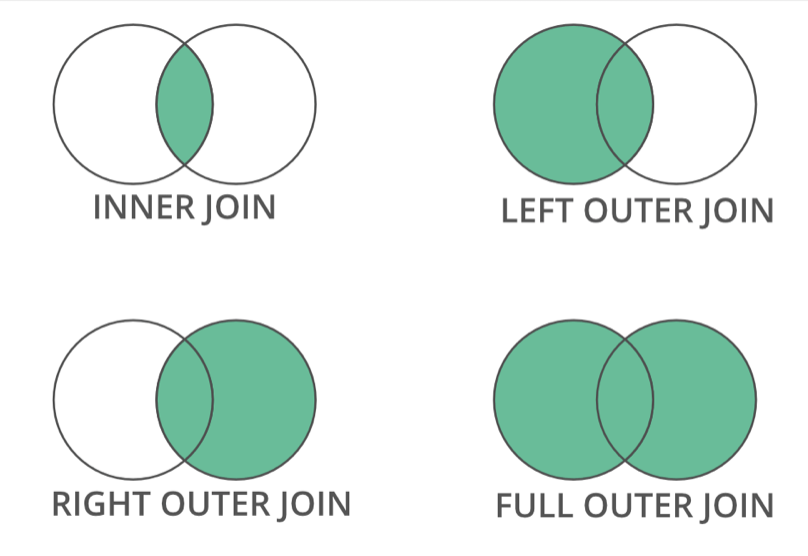

In [82]:
union1 = pd.merge(df3, df4, on='car name')
union1

,mpg,cylinders,displacement,horsepower,weight,car name,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,"""chevrolet chevelle malibu""",12.0,70,1
1,15.0,8,350.0,165.0,3693,"""buick skylark 320""",11.5,70,1
2,18.0,8,318.0,150.0,3436,"""plymouth satellite""",11.0,70,1
3,16.0,8,304.0,150.0,3433,"""amc rebel sst""",12.0,70,1
4,17.0,8,302.0,140.0,3449,"""ford torino""",10.5,70,1
...,...,...,...,...,...,...,...,...,...
296,27.0,4,140.0,86.0,2790,"""ford mustang gl""",15.6,82,1
297,44.0,4,97.0,52.0,2130,"""vw pickup""",24.6,82,2
298,32.0,4,135.0,84.0,2295,"""dodge rampage""",11.6,82,1
299,28.0,4,120.0,79.0,2625,"""ford ranger""",18.6,82,1


In [87]:
union2 = pd.merge(df3, df4, how='left', on=['car name'])
union3 = pd.merge(df3, df4, how='right',  on=['car name'])
union4 = pd.merge(df3, df4, how='inner',  on=['car name'])
union5 = pd.merge(df3, df4, how='outer',  on=['car name'])

### Exportar Data frame

Al trabajar con bases de datos, en muchas ocasiones necesitamos exportar los resultados para utilizarla en otros entornos, por espacio, por eficiencia, o por otros criterios.

En este caso exportaremos la base de datos en 3 escenarios:

* .txt
* .csv
* .xlsx

In [88]:
df.to_excel("mpg1.xlsx", "Sheet1")
df.to_csv("mpg1.csv")
df.to_csv("mpg1.txt")